# **Handwritten Digit Recognition Using Neural Networks**

This project applies both Basic Neural Networks (NN) and Convolutional Neural Networks (CNN) to recognize handwritten digits using the MNIST dataset.

---

## **Table of Contents**

1. Introduction
2. Dataset Overview
3. Data Preprocessing
4. Model 1: Basic Neural Network (NN)
5. Model 2: Convolutional Neural Network (CNN)
6. Model Evaluation
7. Saving Models
8. Conclusion

---

## **1. Introduction**

Handwritten digit recognition is one of the fundamental problems in computer vision. The MNIST dataset, a collection of 28x28 grayscale images of handwritten digits, is widely used to train image processing models.

In this project, we will implement two different models:

- **Basic Neural Network (NN)**
- **Convolutional Neural Network (CNN)**

Both models will be trained on the MNIST dataset and evaluated for performance. Additionally, we'll save the models for future use.

---

## **2. Dataset Overview**

The MNIST dataset consists of 60,000 training images and 10,000 test images of handwritten digits ranging from 0 to 9.

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2024-10-16 08:28:40.782410: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 08:28:41.359285: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 08:28:41.705169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 08:28:42.208565: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 08:28:42.287879: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 08:28:42.819278: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

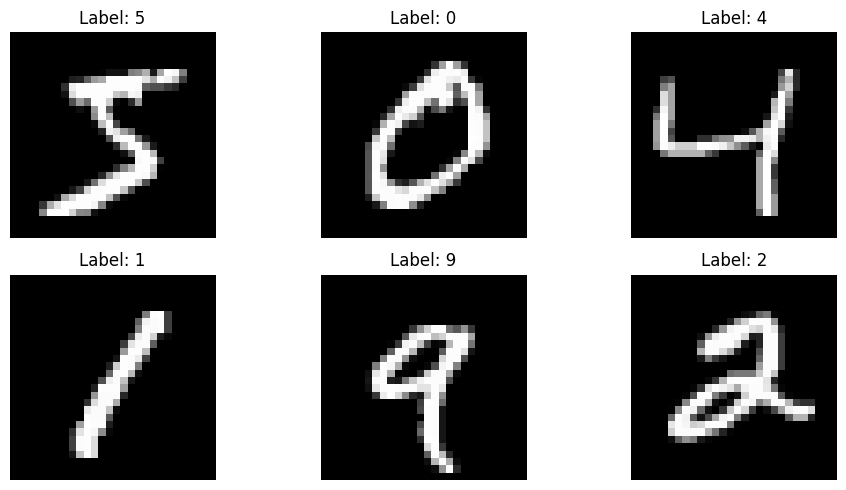

In [3]:
# Display some sample images from the dataset
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


---
## **3. Data Preprocessing**

Before we can feed the data into our models, it needs to be normalized and reshaped into the correct format. We'll also convert the labels to one-hot encoding.



In [4]:
# Reshape and normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Display the shape of the datasets
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)



---

## **4. Model 1: Basic Neural Network (NN)**

We'll first build a simple neural network with a single hidden layer to classify the handwritten digits.


In [5]:
# Build the Basic Neural Network
basic_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
basic_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the Basic Neural Network
basic_history = basic_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


2024-10-16 08:28:49.234443: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1849/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8771 - loss: 0.4312

2024-10-16 08:28:52.942216: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8779 - loss: 0.4287 - val_accuracy: 0.9571 - val_loss: 0.1368
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9652 - loss: 0.1222 - val_accuracy: 0.9707 - val_loss: 0.0975
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9764 - loss: 0.0817 - val_accuracy: 0.9753 - val_loss: 0.0843
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9826 - loss: 0.0593 - val_accuracy: 0.9758 - val_loss: 0.0792
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9860 - loss: 0.0445 - val_accuracy: 0.9754 - val_loss: 0.0818
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9899 - loss: 0.0341 - val_accuracy: 0.9783 - val_loss: 0.0759
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9915 - loss: 0.0281 - val_accuracy: 0.9769 - val_loss: 0.0804
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accurac

### **Evaluate Basic NN Performance**


In [6]:
# Evaluate the Basic NN model
basic_loss, basic_acc = basic_model.evaluate(x_test, y_test)
print(f"Basic NN Test Accuracy: {basic_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.9736 - loss: 0.0991
Basic NN Test Accuracy: 0.9770



---

## **5. Model 2: Convolutional Neural Network (CNN)**

Next, we'll build a more advanced Convolutional Neural Network (CNN), which is better suited for image data.


In [7]:
# Build the Convolutional Neural Network (CNN)
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2024-10-16 08:29:27.814482: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9106 - loss: 0.2967 - val_accuracy: 0.9880 - val_loss: 0.0376
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9869 - loss: 0.0427 - val_accuracy: 0.9882 - val_loss: 0.0344
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9917 - loss: 0.0277 - val_accuracy: 0.9905 - val_loss: 0.0290
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9932 - loss: 0.0209 - val_accuracy: 0.9890 - val_loss: 0.0332
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.9920 - val_loss: 0.0285
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9966 - loss: 0.0110 - val_accuracy: 0.9919 - val_loss: 0.0271
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.9977 - loss: 0.0078 - val_accuracy: 0.9925 - val_loss: 0.0283
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9972 - loss: 0.00


### **Evaluate CNN Performance**


In [8]:
# Evaluate the CNN model
cnn_loss, cnn_acc = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9908 - loss: 0.0355
CNN Test Accuracy: 0.9925



---

## **6. Model Evaluation**

We will now compare the performance of both models using accuracy and loss metrics.



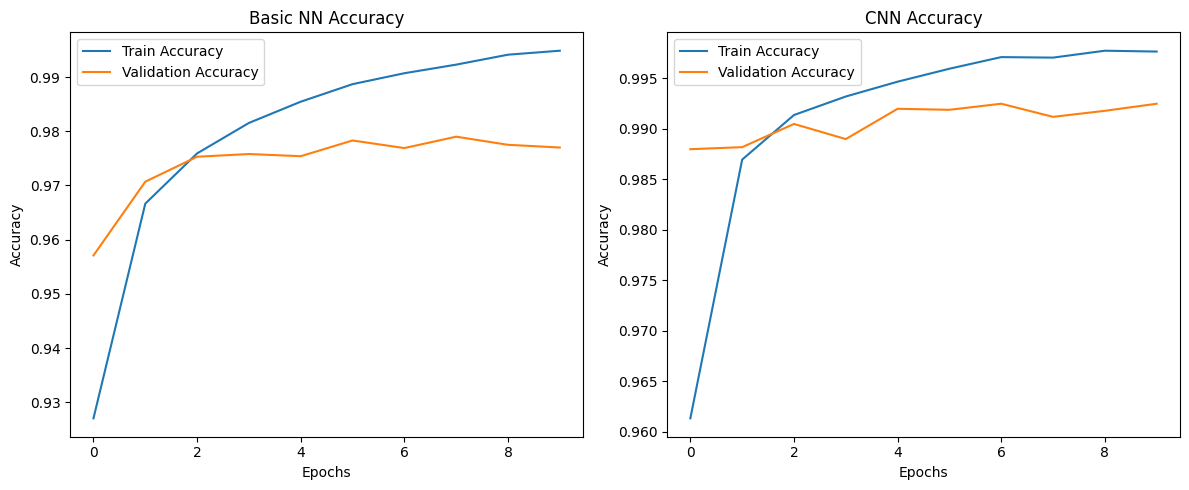

In [9]:
# Plot the training and validation accuracy of both models
plt.figure(figsize=(12, 5))

# Basic NN accuracy
plt.subplot(1, 2, 1)
plt.plot(basic_history.history['accuracy'], label='Train Accuracy')
plt.plot(basic_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic NN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# CNN accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

---

## **7. Saving Models**

Both the Basic Neural Network and Convolutional Neural Network models will be saved for future use.


In [10]:
import os

# Create a directory to save models
if not os.path.exists('models'):
    os.makedirs('models')

# Save the Basic NN model
basic_model.save('models/basic_nn_model.h5')
print("Basic NN Model saved as 'models/basic_nn_model.h5'")

# Save the CNN model
cnn_model.save('models/cnn_model.h5')
print("CNN Model saved as 'models/cnn_model.h5'")

Basic NN Model saved as 'models/basic_nn_model.h5'
CNN Model saved as 'models/cnn_model.h5'



---

## **8. Conclusion**

In this project, we implemented two models to classify handwritten digits: a Basic Neural Network (NN) and a Convolutional Neural Network (CNN). As expected, the CNN performed significantly better on the MNIST dataset due to its ability to learn spatial hierarchies in the data. The CNN model achieved higher accuracy and is more suited for image classification tasks.

---